## Multidimensional Scaling (MDS)

The fundamental idea of MDS is to represent high-dimensional point cloud in few (usually 2) dimensions keeping distances between points similar. There are mainly two types.

* Classical/Metric MDS: Use a clever projection R: cmdscale

* Non-metric MDS: Squeeze data on table R: isoMDS

For more information, see http://geostatisticslessons.com/lessons/mds

We will discuss only the Classical/Metric MDS in QBUS3820.

**Key problem**: Given euclidean distances among points, how to recover the position of the points?

We will look at a couple of examples of answer this question.

In [145]:
from sklearn import manifold
from sklearn.manifold import MDS
import pandas as pd
from sklearn import metrics

Example 1: The eurodist datset provides the road distances (in kilometers) between 21 cities in Europe. Given this matrix of pairwise (non-Euclidean) distances $D=[d_{ij}]$, MDS can be used to recover the coordinates of the cities in some Euclidean referential whose orientation is arbitrary.

In [160]:
df=pd.read_csv('eurodist.csv')
print(df.iloc[:5,:5])

        city  Athens  Barcelona  Brussels  Calais
0     Athens       0       3313      2963    3175
1  Barcelona    3313          0      1318    1326
2   Brussels    2963       1318         0     204
3     Calais    3175       1326       204       0
4  Cherbourg    3339       1294       583     460


In [162]:
city = df["city"]
D = np.array(df.iloc[:, 1:])  # Distance matrix

However, using **Multidimensional Scaling** the task becomes simple:

In [166]:
mds = MDS(dissimilarity='precomputed', n_components=2, random_state=40, max_iter=3000,eps=1e-9)
X = mds.fit_transform(D)

In [ ]:
# Recover coordinates of the cities in Euclidean referential whose orientation is arbitrary:
Deuclidean = metrics.pairwise.pairwise_distances(loc, metric='euclidean') 
print(np.round(Deuclidean[:5, :5]))


In [167]:
Deuclidean = metrics.pairwise.pairwise_distances(X, metric='euclidean') 
print(np.round(Deuclidean[:5, :5]))

[[   0. 3116. 2994. 3181. 3428.]
 [3116.    0. 1317. 1289. 1128.]
 [2994. 1317.    0.  198.  538.]
 [3181. 1289.  198.    0.  358.]
 [3428. 1128.  538.  358.    0.]]


(-2144.37461091848,
 2014.9241548603975,
 -2910.0457426433672,
 1371.5002504082572)

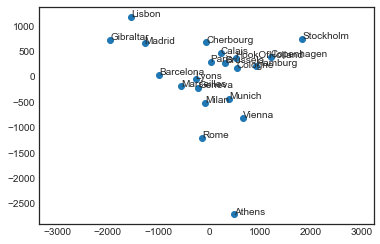

In [168]:
# Plot: apply some rotation and flip
theta = 80 * np.pi / 180.
rot = np.array([[np.cos(theta), -np.sin(theta)],
                [np.sin(theta),  np.cos(theta)]])
Xr = np.dot(loc, rot)
# flip x
locr[:, 0] *= -1
plt.scatter(Xr[:, 0], Xr[:, 1])
for i in range(len(cities)):
    plt.text(Xr[i, 0], locr[i, 1], cities[i])
plt.axis('equal')

Example 2: distance between fashion brands

In [116]:
labs ="Coveri Missoni Gigli Moschino MilaSchon Valentino Krizia Versace Ferre Armani".split(" ")

In [117]:
d = np.array([7.00,8.11,6.33,8.67,8.56,7.56,7.33,7.67,7.89,
          8.22,8.33,7.89,8.22,7.00,8.22,8.33,8.56,
          6.33,8.11,8.56,8.44,6.00,8.22,7.89,
          8.78,8.67,7.89,8.00,8.33,8.56,
          4.11,4.33,8.00,8.56,7.56,
          3.56,6.00,7.00,6.56,
          7.11,7.22,3.78,
          6.56,7.78,
          6.00],dtype=np.float32);

In [118]:
import numpy

d = numpy.zeros([10, 10])
d[numpy.triu_indices(10, 1)] = [7.00,8.11,6.33,8.67,8.56,7.56,7.33,7.67,7.89,
          8.22,8.33,7.89,8.22,7.00,8.22,8.33,8.56,
          6.33,8.11,8.56,8.44,6.00,8.22,7.89,
          8.78,8.67,7.89,8.00,8.33,8.56,
          4.11,4.33,8.00,8.56,7.56,
          3.56,6.00,7.00,6.56,
          7.11,7.22,3.78,
          6.56,7.78,
          6.00]
d


array([[0.  , 7.  , 8.11, 6.33, 8.67, 8.56, 7.56, 7.33, 7.67, 7.89],
       [0.  , 0.  , 8.22, 8.33, 7.89, 8.22, 7.  , 8.22, 8.33, 8.56],
       [0.  , 0.  , 0.  , 6.33, 8.11, 8.56, 8.44, 6.  , 8.22, 7.89],
       [0.  , 0.  , 0.  , 0.  , 8.78, 8.67, 7.89, 8.  , 8.33, 8.56],
       [0.  , 0.  , 0.  , 0.  , 0.  , 4.11, 4.33, 8.  , 8.56, 7.56],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 3.56, 6.  , 7.  , 6.56],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 7.11, 7.22, 3.78],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 6.56, 7.78],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 6.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

In [119]:
d+=d.T

In [120]:
d

array([[0.  , 7.  , 8.11, 6.33, 8.67, 8.56, 7.56, 7.33, 7.67, 7.89],
       [7.  , 0.  , 8.22, 8.33, 7.89, 8.22, 7.  , 8.22, 8.33, 8.56],
       [8.11, 8.22, 0.  , 6.33, 8.11, 8.56, 8.44, 6.  , 8.22, 7.89],
       [6.33, 8.33, 6.33, 0.  , 8.78, 8.67, 7.89, 8.  , 8.33, 8.56],
       [8.67, 7.89, 8.11, 8.78, 0.  , 4.11, 4.33, 8.  , 8.56, 7.56],
       [8.56, 8.22, 8.56, 8.67, 4.11, 0.  , 3.56, 6.  , 7.  , 6.56],
       [7.56, 7.  , 8.44, 7.89, 4.33, 3.56, 0.  , 7.11, 7.22, 3.78],
       [7.33, 8.22, 6.  , 8.  , 8.  , 6.  , 7.11, 0.  , 6.56, 7.78],
       [7.67, 8.33, 8.22, 8.33, 8.56, 7.  , 7.22, 6.56, 0.  , 6.  ],
       [7.89, 8.56, 7.89, 8.56, 7.56, 6.56, 3.78, 7.78, 6.  , 0.  ]])

In [112]:
D = np.array([[0.  , 7.  , 8.11, 6.33, 8.67, 8.56, 7.56, 7.33, 7.67, 7.89],
       [7.  , 0.  , 8.22, 8.33, 7.89, 8.22, 7.  , 8.22, 8.33, 8.56],
       [8.11, 8.22, 0.  , 6.33, 8.11, 8.56, 8.44, 6.  , 8.22, 7.89],
       [6.33, 8.33, 6.33, 0.  , 8.78, 8.67, 7.89, 8.  , 8.33, 8.56],
       [8.67, 7.89, 8.11, 8.78, 0.  , 4.11, 4.33, 8.  , 8.56, 7.56],
       [8.56, 8.22, 8.56, 8.67, 4.11, 0.  , 3.56, 6.  , 7.  , 6.56],
       [7.56, 7.  , 8.44, 7.89, 4.33, 3.56, 0.  , 7.11, 7.22, 3.78],
       [7.33, 8.22, 6.  , 8.  , 8.  , 6.  , 7.11, 0.  , 6.56, 7.78],
       [7.67, 8.33, 8.22, 8.33, 8.56, 7.  , 7.22, 6.56, 0.  , 6.  ],
       [7.89, 8.56, 7.89, 8.56, 7.56, 6.56, 3.78, 7.78, 6.  , 0.  ]], dtype=np.float32)

In [133]:
mds = manifold.MDS(2, dissimilarity='precomputed')

In [122]:
coords = mds.fit_transform(D)

In [123]:
x, y = coords[:, 0], -coords[:, 1]

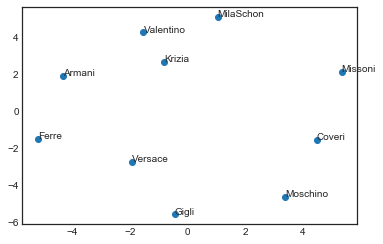

In [124]:
fig, ax = plt.subplots()
ax.scatter(x, y)
for (lab, _x, _y) in zip(labs, x, y):
    ax.annotate(lab, (_x, _y))
plt.show()